<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/EquationsOfState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Equations of State
#@markdown In physics and thermodynamics, an equation of state is a thermodynamic equation relating state variables which describe the state of matter under a given set of physical conditions, such as pressure, volume, temperature (PVT), or internal energy. See [Wikipedia page on Equations Of State](https://en.wikipedia.org/wiki/Equation_of_state).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

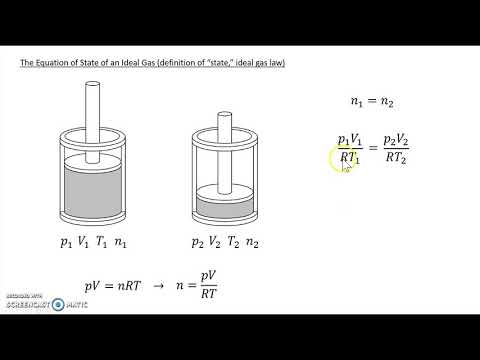

In [0]:
#@title  Introduction to Equations of State
#@markdown Introduction to equations of state with some common examples
from IPython.display import YouTubeVideo
YouTubeVideo('Svu8kpPRnlo', width=600, height=400)

## Cubic Equations of State
Equation of State are used to predict pure component and mixture properties such as compressibility, fugacity and mixture equilibrium.

Text(0, 0.5, 'Pressure [bara]')

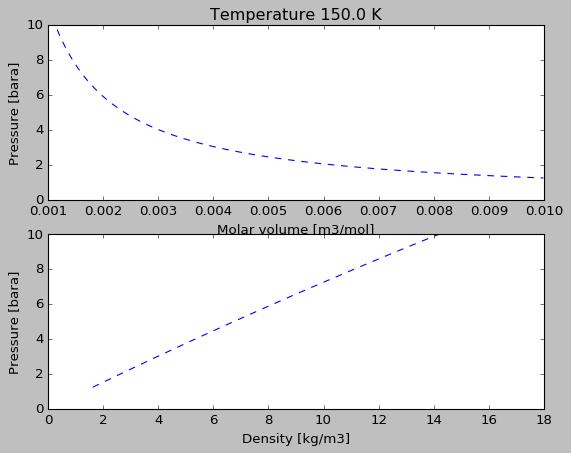

In [84]:
#@title Soave - Redlich - Kwong (SRK) EOS
#@markdown The SRK-EoS is defined as P = RT / (V - b)  - a α / V(V + b)
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')

Tc= 190.0 #K
Pc = 76.4e5 #Pa
acsFactor=0.01 #-
MolarMass = 16.04 # gr/mol
R = 8.314 #J/mol/K
T = 150.0 #K
Tr = T/Tc #-

a = 0.42748*R*R*Tc*Tc/Pc
b = 0.08664*R*Tc/Pc
alpha = math.pow(1.0 + (0.48 + 1.574*acsFactor - 0.176*acsFactor*acsFactor)*(1.0 - math.pow(Tr,0.5)), 2.0)

def pressure(V):
  P = R*T/(V-b)- a*alpha/(V*(V + b))
  return P/1.0e5

molvolRange = np.arange(0.001, 0.010, 0.000010)
densRange =MolarMass/molvolRange/1000.0;
pressureRange = [pressure(vol) for vol in molvolRange]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(molvolRange, pressureRange, '--')
plt.ylim(0, 10.0);
titale = 'Temperature '+str(T)+ ' K'
plt.title(titale)
plt.xlabel('Molar volume [m3/mol]')
plt.ylabel('Pressure [bara]')
plt.subplot(2, 1, 2)
plt.plot(densRange, pressureRange, '--')
plt.ylim(0, 10.0);
plt.xlabel('Density [kg/m3]')
plt.ylabel('Pressure [bara]')


In [86]:
#@title Calculation using SRK in NeqSim
#@markdown The following script calcluates the density of methane using SRK in NeqSim. Checking a point at 150 K and 4 bara

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole to the fluid
fluid1.setTemperature(150.0, 'K')
fluid1.setPressure(4.0, 'bara')
TPflash(fluid1)
fluid1.initProperties()

print("methane density ", fluid1.getDensity(), " kg/m3")

methane density  5.475101334801241  kg/m3
